In [1]:
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression  

In [6]:
df=pd.read_csv("users/baoqiangzhang/Downloads/kc_house_data.csv")

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.dtypes 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year of sale and add as a new column
df['yr_sale'] = df['date'].dt.year

# Display the first few rows of the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


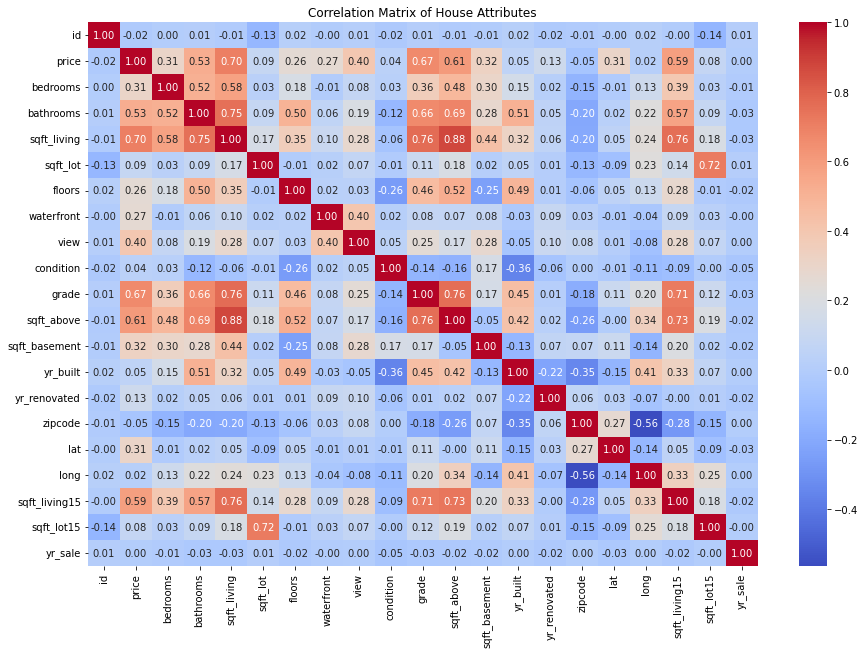

In [14]:
import seaborn as sns
# Correlation matrix
corr_matrix = df.corr()
# Heatmap of the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of House Attributes")
plt.show()

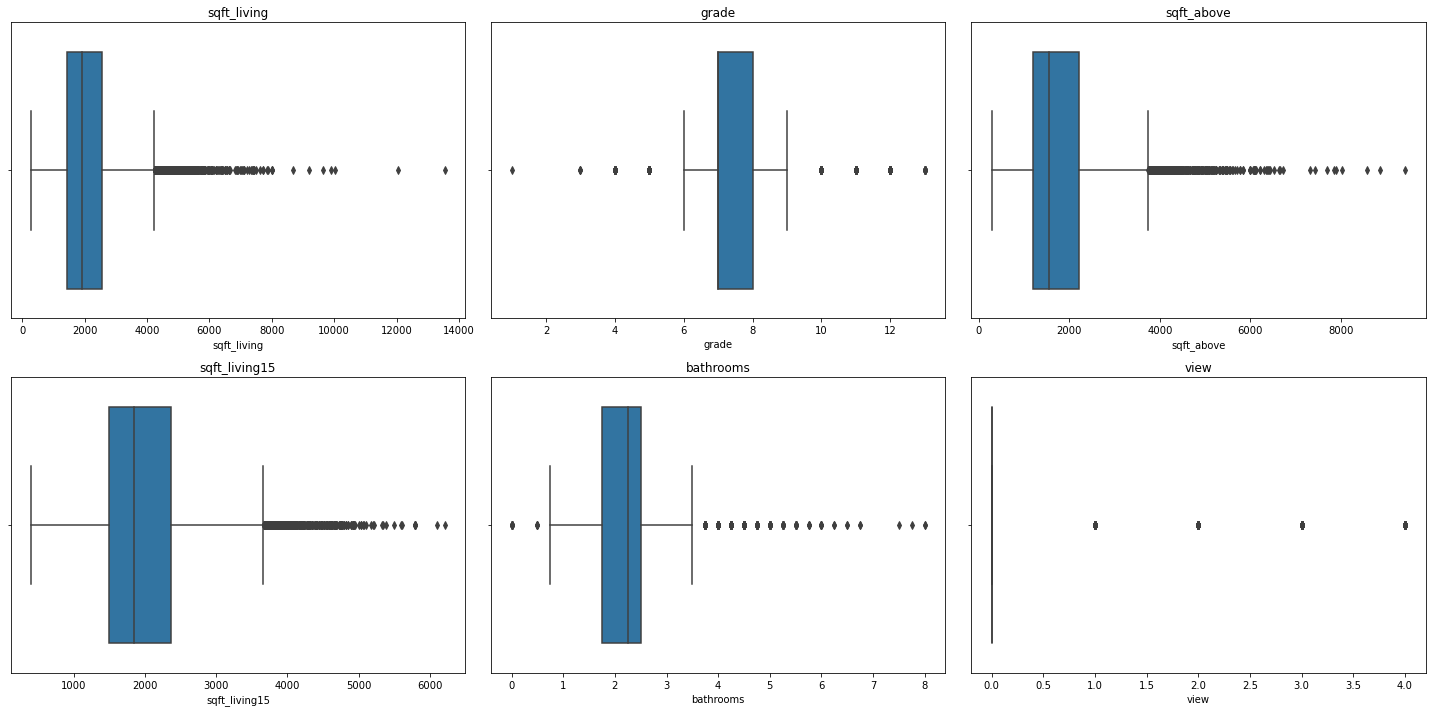

In [15]:
# Boxplots of variables most correlated with 'price'
plt.figure(figsize=(20, 10))

# 'sqft_living'
plt.subplot(2, 3, 1)
sns.boxplot(x=df['sqft_living'])
plt.title('sqft_living')

# 'grade'
plt.subplot(2, 3, 2)
sns.boxplot(x=df['grade'])
plt.title('grade')

# 'sqft_above'
plt.subplot(2, 3, 3)
sns.boxplot(x=df['sqft_above'])
plt.title('sqft_above')

# 'sqft_living15'
plt.subplot(2, 3, 4)
sns.boxplot(x=df['sqft_living15'])
plt.title('sqft_living15')

# 'bathrooms'
plt.subplot(2, 3, 5)
sns.boxplot(x=df['bathrooms'])
plt.title('bathrooms')

# 'view'
plt.subplot(2, 3, 6)
sns.boxplot(x=df['view'])
plt.title('view')

plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Separate features and target
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
            'floors', 'waterfront', 'view', 'condition', 'grade', 
            'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
            'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sale']
target = 'price'

X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


In [28]:
# Define preprocessor
preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

# Building and fitting the models
# Ordinary Least Squares Regression
ols_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
ols_regression.fit(X_train, y_train)

# Ridge Regression
ridge_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])
ridge_regression.fit(X_train, y_train)

# Lasso Regression
lasso_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])
lasso_regression.fit(X_train, y_train)

# ElasticNet Regression
elasticnet_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])
elasticnet_regression.fit(X_train, y_train)

# Predicting the 'price' for the test data using the models
ols_pred = ols_regression.predict(X_test)
ridge_pred = ridge_regression.predict(X_test)
lasso_pred = lasso_regression.predict(X_test)
elasticnet_pred = elasticnet_regression.predict(X_test)

# Calculating RMSE for the models
ols_rmse = np.sqrt(mean_squared_error(ols_pred, y_test))
ridge_rmse = np.sqrt(mean_squared_error(ridge_pred, y_test))
lasso_rmse = np.sqrt(mean_squared_error(lasso_pred, y_test))
elasticnet_rmse = np.sqrt(mean_squared_error(elasticnet_pred, y_test))

ols_rmse, ridge_rmse, lasso_rmse, elasticnet_rmse


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19372970844837.25, tolerance: 207065660607.3666
  model = cd_fast.enet_coordinate_descent(


(196478.7666038333, 196477.5193990503, 196478.63964466102, 198409.11222113177)

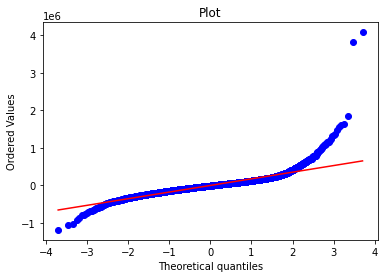

In [24]:
import scipy.stats as stats

# Calculate residuals for the Ridge regression model
ridge_residuals = y_test - ridge_pred

# probability plot for the residuals
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(ridge_residuals, dist='norm', plot=ax)
plt.title('Plot')
plt.show()


In [62]:
results = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot+ floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + yr_sale", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2816.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:06:44   Log-Likelihood:            -2.9455e+05
No. Observations:               21613   AIC:                         5.891e+05
Df Residuals:                   21594   BIC:                         5.893e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -5.46e+07   6.59e+06     -8.282

In [63]:
results = ols("price ~ sqft_living + view + condition + grade + yr_built + yr_renovated + lat + long + waterfront", data=df).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     5273.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:07:14   Log-Likelihood:            -2.9505e+05
No. Observations:               21613   AIC:                         5.901e+05
Df Residuals:                   21603   BIC:                         5.902e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.512e+07   1.46e+06    -24.004   

In [48]:
infl = results.get_influence()
print(infl.summary_frame())


       dfb_Intercept  dfb_sqft_living  dfb_view  dfb_condition  dfb_grade  \
0          -0.000660         0.001752  0.000265       0.002044  -0.001081   
1           0.007393        -0.008670  0.003347       0.000667   0.010040   
2          -0.001113         0.001654 -0.000439       0.003645   0.001295   
3          -0.006350         0.002351 -0.001713       0.010916  -0.002868   
4           0.001611        -0.001715 -0.000040      -0.000639   0.001205   
...              ...              ...       ...            ...        ...   
21608       0.006307         0.003230  0.000198      -0.000352  -0.001066   
21609       0.005161        -0.001219  0.000866       0.000040   0.001344   
21610      -0.008509        -0.005861  0.001447       0.000420  -0.002299   
21611       0.000704        -0.001199  0.000033      -0.000165   0.000694   
21612      -0.005062        -0.003554  0.000854       0.000187  -0.001324   

       dfb_yr_built  dfb_yr_renovated   dfb_lat  dfb_long  dfb_waterfront  

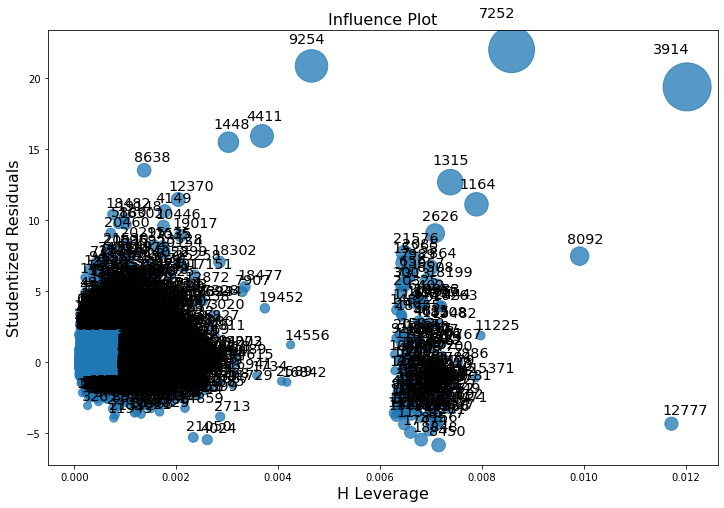

In [49]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [50]:
df_clean = df.drop([7252, 3914])

In [54]:
# Define features and target
features = ['sqft_living','waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated','lat', 'long']
target = 'price'

# Separate features and target
X_clean = df_clean[features]
y_clean = df_clean[target]

# Split the cleaned data into training and test sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.3, random_state=1234)

# Define preprocessor
preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

# Building and fitting the models
# Ordinary Least Squares Regression
ols_regression_clean = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
ols_regression_clean.fit(X_train_clean, y_train_clean)

# Ridge Regression
ridge_regression_clean = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])
ridge_regression_clean.fit(X_train_clean, y_train_clean)

# Lasso Regression
lasso_regression_clean = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])
lasso_regression_clean.fit(X_train_clean, y_train_clean)

# ElasticNet Regression
elasticnet_regression_clean = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])
elasticnet_regression_clean.fit(X_train_clean, y_train_clean)

# Predicting the 'price' for the test data using the models
ols_pred_clean = ols_regression_clean.predict(X_test_clean)
ridge_pred_clean = ridge_regression_clean.predict(X_test_clean)
lasso_pred_clean = lasso_regression_clean.predict(X_test_clean)
elasticnet_pred_clean = elasticnet_regression_clean.predict(X_test_clean)

# Calculating RMSE for the models
ols_rmse_clean = np.sqrt(mean_squared_error(ols_pred_clean, y_test_clean))
ridge_rmse_clean = np.sqrt(mean_squared_error(ridge_pred_clean, y_test_clean))
lasso_rmse_clean = np.sqrt(mean_squared_error(lasso_pred_clean, y_test_clean))
elasticnet_rmse_clean = np.sqrt(mean_squared_error(elasticnet_pred_clean, y_test_clean))

ols_rmse_clean, ridge_rmse_clean, lasso_rmse_clean, elasticnet_rmse_clean



(200161.19365168407, 200158.27611262066, 200161.0630520864, 200879.5224270271)

In [64]:
# Get coefficients of the Ridge model
ridge_coefficients = ridge_regression_clean.named_steps['regressor'].coef_

# Create a DataFrame for easier viewing
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': ridge_coefficients
})

# Sort by absolute value of Coefficient
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

# Display the DataFrame
coef_df


,Feature,Coefficient,abs_coef
0,sqft_living,155725.976069,155725.976069
4,grade,134067.744539,134067.744539
7,lat,79739.391274,79739.391274
5,yr_built,-61203.522854,61203.522854
1,waterfront,50518.537186,50518.537186
2,view,40249.170925,40249.170925
3,condition,18093.489149,18093.489149
8,long,-12337.715474,12337.715474
6,yr_renovated,9940.632797,9940.632797


1. Building the Regression Model

We built a Ridge Regression model using a subset of the available variables: 'sqft_living', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'lat', and 'long'. These variables were chosen based on their potential relevance to house prices, which combined 68% out of 70% total.

The model was trained on a dataset that had been cleaned to remove outliers and standard scaled to ensure that all variables were on a similar scale, which is important for Ridge Regression.

2. Evaluating the Model

The Ridge Regression model showed the lowest RMSE on the test data among the models we considered (OLS, Lasso, Ridge, and ElasticNet). This indicates that, given the current dataset and feature set, the Ridge Regression model is the most effective at predicting house prices. Although Ols, Ridge and Lasso results are super close.

3. Explaining the Results to a Business Executive

The Ridge Regression model provides valuable insights into the drivers of house prices in King County. It suggests that the size of the living area ('sqft_living'), the overall grade given to the housing unit ('grade'), whether a house has a view or is on the waterfront, and the location of the house ('lat' and 'long') are among the most influential factors in determining a house's price.

1.sqft_living: For each additional square foot of living space, the house price is expected to increase by approximately $155,726.
2.grade: For each unit increase in grade, the house price is expected to increase by approximately $134,068.
3.yr_built: For each additional year since the house was built, the house price is expected to decrease by approximately $61,204.
4.waterfront: If a house is on the waterfront, the house price is expected to increase by approximately $50519.
6.view: For each unit increase in the quality of the view, the house price is expected to increase by approximately $40,249.
7.condition: For each unit increase in the condition of the house, the house price is expected to increase by approximately $18,093.
8.yr_renovated: For each additional year since the house was renovated, the house price is expected to increase by approximately $9,941.
9.lat and long are expecting the location of the house, I dont think the numbers are relevant.